In [1]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model, Sequential
from keras.layers import Input, Flatten, Dense, Dropout, Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras import optimizers
import numpy as np
from keras.layers.core import Lambda
from keras import backend as K
from keras import regularizers
import matplotlib.pyplot as plt
import os

os.environ['CUDA_VISIBLE_DEVICES'] = '0'


Using TensorFlow backend.


In [2]:
from keras.datasets import cifar100

(x_train, y_train), (x_test, y_test) = cifar100.load_data()

169009152/169001437 [==============================] - 2s 0us/step


In [3]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


In [4]:
train=True
num_classes = 100
weight_decay = 0.0005
x_shape = [32,32,3]

In [5]:
img_input = Input(shape = x_train.shape[1:]) 
model = Sequential()
weight_decay = weight_decay



 # Block 1
x = Conv2D(64, (3, 3), padding='same',input_shape=x_shape,kernel_regularizer=regularizers.l2(weight_decay), name='block1_conv1')(img_input)
x = Activation('relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)
x = Conv2D(64, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay), name='block1_conv2')(x)
x = Activation('relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2),name='block1_pool')(x)

    # Block 2
x = Conv2D(128, (3, 3),padding='same',kernel_regularizer=regularizers.l2(weight_decay), name='block2_conv1')(x)
x = Activation('relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.4)(x)
x = Conv2D(128, (3, 3), padding='same', name='block2_conv2')(x)
x = Activation('relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2),name='block2_pool')(x)

    # Block 3
x = Conv2D(256, (3, 3),padding='same',kernel_regularizer=regularizers.l2(weight_decay), name='block3_conv1')(x)
x = Activation('relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.4)(x)
x = Conv2D(256, (3, 3),padding='same', name='block3_conv2')(x)
x = Activation('relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.4)(x)
x = Conv2D(256, (3, 3),padding='same', name='block3_conv3')(x)
x = Activation('relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2),name='block3_pool')(x)

    # Block 4
x = Conv2D(512, (3, 3),padding='same',kernel_regularizer=regularizers.l2(weight_decay), name='block4_conv1')(x)
x = Activation('relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.4)(x)
x = Conv2D(512, (3, 3),padding='same', name='block4_conv2')(x)
x = Activation('relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.4)(x)
x = Conv2D(512, (3, 3),padding='same', name='block4_conv3')(x)
x = Activation('relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2),name='block4_pool')(x)

    # Block 5
x = Conv2D(512, (3, 3),padding='same',kernel_regularizer=regularizers.l2(weight_decay), name='block5_conv1')(x)
x = Activation('relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.4)(x)
x = Conv2D(512, (3, 3),padding='same', name='block5_conv2')(x)
x = Activation('relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.4)(x)
x = Conv2D(512, (3, 3),padding='same', name='block5_conv3')(x)
x = Activation('relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2),name='block5_pool')(x)
    
x = Flatten(name='flatten')(x)
x = Dense(512,kernel_regularizer=regularizers.l2(weight_decay))(x)
x = Activation('relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(num_classes)(x)
x = Activation('softmax')(x)


model = Model(img_input, x)
model.summary()



Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 64)        0         
_________________________________________________________________
block1_conv2 (Conv2D)

In [6]:
# The data, shuffled and split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar100.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [7]:
batch_size = 128
maxepoches = 200
learning_rate = 0.1
lr_decay = 1e-6
lr_drop = 20

def lr_scheduler(epoch):
    return learning_rate * (0.5 ** (epoch // lr_drop))
reduce_lr = keras.callbacks.LearningRateScheduler(lr_scheduler)


#data augmentation
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=15,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False)  # randomly flip images
# (std, mean, and principal components if ZCA whitening is applied).
datagen.fit(x_train)



#optimization details
sgd = optimizers.SGD(lr=learning_rate, decay=lr_decay, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd,metrics=['accuracy'])


# training process in a for loop with learning rate drop every 25 epoches.

hist = model.fit_generator(datagen.flow(x_train, y_train,
                                 batch_size=batch_size),
                    steps_per_epoch=x_train.shape[0] // batch_size,
                    epochs=maxepoches,
                    validation_data=(x_test, y_test),callbacks=[reduce_lr],verbose=2)
model.save_weights('cifar100vgg.h5')  

Instructions for updating:
Use tf.cast instead.
Epoch 1/200
 - 40s - loss: 22.3527 - acc: 0.0330 - val_loss: 17.6932 - val_acc: 0.0221
Epoch 2/200
 - 34s - loss: 12.9090 - acc: 0.0552 - val_loss: 10.6760 - val_acc: 0.0253
Epoch 3/200
 - 34s - loss: 8.2818 - acc: 0.0685 - val_loss: 8.9575 - val_acc: 0.0185
Epoch 4/200
 - 34s - loss: 6.1680 - acc: 0.0783 - val_loss: 6.8378 - val_acc: 0.0250
Epoch 5/200
 - 34s - loss: 5.3028 - acc: 0.0811 - val_loss: 5.9372 - val_acc: 0.0299
Epoch 6/200
 - 34s - loss: 4.8213 - acc: 0.0902 - val_loss: 5.7723 - val_acc: 0.0261
Epoch 7/200
 - 34s - loss: 4.5141 - acc: 0.1071 - val_loss: 5.3061 - val_acc: 0.0519
Epoch 8/200
 - 33s - loss: 4.7941 - acc: 0.1082 - val_loss: 7.5145 - val_acc: 0.0262
Epoch 9/200
 - 34s - loss: 4.7733 - acc: 0.1263 - val_loss: 5.6782 - val_acc: 0.0375
Epoch 10/200
 - 33s - loss: 4.4326 - acc: 0.1341 - val_loss: 9.4758 - val_acc: 0.0108
Epoch 11/200
 - 33s - loss: 4.4766 - acc: 0.1342 - val_loss: 5.8952 - val_acc: 0.0455
Epoch 12/20

In [8]:
(x_train, y_train), (x_test, y_test) = cifar100.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

scores = model.evaluate(x_test, y_test, verbose=0)
print("Training Accuracy: %.2f%%" % (hist.history['acc'][maxepoches - 1]*100))
print("Testing Accuracy: %.2f%%" % (scores[1]*100))

Training Accuracy: 73.71%
Testing Accuracy: 56.54%


Saved model to disk


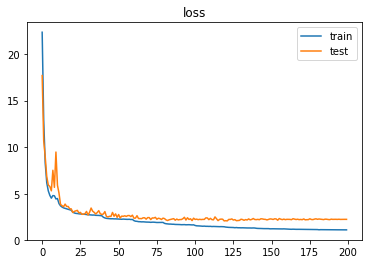

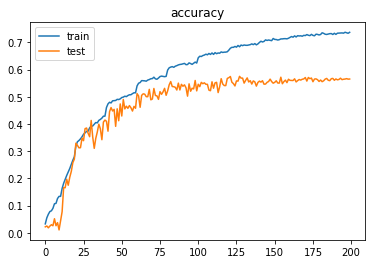

In [9]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['train','test'])
plt.title('loss')
plt.savefig("loss7.png",dpi=300,format="png")
plt.figure()
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.legend(['train','test'])
plt.title('accuracy')
plt.savefig("accuracy7.png",dpi=300,format="png")
model_json = model.to_json()
with open("model7.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model7.h5")
print("Saved model to disk")